In [1]:
#Import required libraries
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
#Create data generator
generator = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30,
    rescale=1.0/255)

test = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_dir = "gender_dataset/Train"
test_dir = "gender_dataset/Test"
val_dir = "gender_dataset/Validation"

In [6]:
#Fit the generators
train_generator = generator.flow_from_directory(train_dir,
                                               batch_size=256,
                                               class_mode = 'binary',
                                               target_size = (64,64))

Found 160000 images belonging to 2 classes.


In [7]:
valid_generator = test.flow_from_directory(val_dir,
                                          batch_size=256,
                                          class_mode='binary',
                                          target_size=(64,64))

Found 22598 images belonging to 2 classes.


In [8]:
#Build the model. We will use 5 conv layers with BN
model = tf.keras.models.Sequential()

#CONV 1
model.add(tf.keras.layers.Conv2D(64,(9,9),input_shape = (64,64,3),activation = 'relu', strides = (3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2),strides = (2,2)))256

#CONV 2
model.add(tf.keras.layers.Conv2D(128,(9,9),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

#CONV 3
model.add(tf.keras.layers.Conv2D(256,(3,3),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

#CONV 4
model.add(tf.keras.layers.Conv2D(384,(3,3),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2,2),strides = (2,2)))
model.add(tf.keras.layers.Flatten())

#2 FC layers with Droputs
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [9]:
#Default
from keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.001)
metric = ['accuracy']
loss = "binary_crossentropy"

In [10]:
#Also create a learning schedule
from keras.callbacks import ReduceLROnPlateau

In [11]:
lr_scheduler = ReduceLROnPlateau(factor = 0.2,
                                monitor = 'val_accuracy',
                                min_lr = 0.00001,
                                patiance = 3)

In [13]:
model.compile(optimizer=optimizer, metrics=metric, loss=loss)

In [15]:
history = model.fit_generator(generator = train_generator,
                             validation_data= valid_generator,
                             steps_per_epoch=256,
                             validation_steps=256,
                             epochs = 30)

Epoch 1/30
256/256 [==============================] - 959s 4s/step - loss: 0.6938 - accuracy: 0.5748 - val_loss: 0.6842 - val_accuracy: 0.5668
Epoch 2/30
256/256 [==============================] - 660s 3s/step - loss: 0.5795 - accuracy: 0.6954
Epoch 3/30
256/256 [==============================] - 710s 3s/step - loss: 0.4868 - accuracy: 0.7694
Epoch 4/30
256/256 [==============================] - 717s 3s/step - loss: 0.4032 - accuracy: 0.8179
Epoch 5/30
256/256 [==============================] - 708s 3s/step - loss: 0.3374 - accuracy: 0.8539
Epoch 6/30
256/256 [==============================] - 704s 3s/step - loss: 0.2960 - accuracy: 0.8751
Epoch 7/30
256/256 [==============================] - 702s 3s/step - loss: 0.2753 - accuracy: 0.8824
Epoch 8/30
256/256 [==============================] - 678s 3s/step - loss: 0.2564 - accuracy: 0.8922
Epoch 9/30
256/256 [==============================] - 622s 2s/step - loss: 0.2423 - accuracy: 0.8991
Epoch 10/30
256/256 [============================

In [30]:
?tf.keras.models.Sequential.fit_generator

In [16]:
model.save("gender_classify.h5")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 64)        15616     
_________________________________________________________________
batch_normalization (BatchNo (None, 19, 19, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 128)         663680    
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 256)         1

(1, 64, 64, 3)
[1.]
is a man


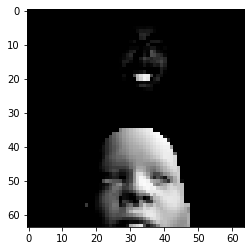

In [43]:
import numpy as np

from keras.preprocessing import image
# predicting images
path = "gender_dataset/Custom/cursed.png"
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)

images = np.vstack([x])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("is a man")
else:
    print( " is a female")
plt.imshow(img)